             preco_ultimo_negocio
data_pregao                      
2022-04-13                   3.54
2022-05-02                   3.06
2022-03-29                   2.95
2022-03-14                   1.94
2022-04-14                   3.41


<function matplotlib.pyplot.show(close=None, block=None)>

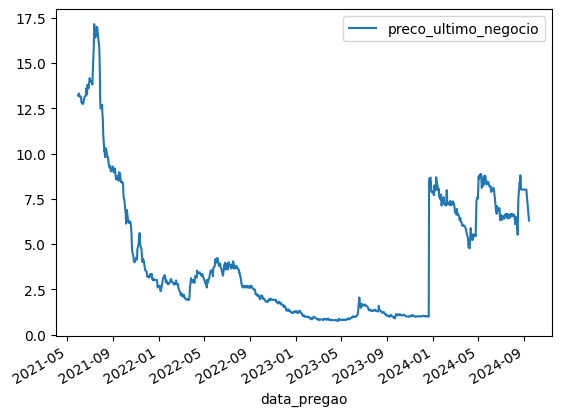

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

data = pd.read_csv('./dataset/dados_pregao_dotz3.csv', header=0, parse_dates=True, index_col=0)
df = data[['preco_ultimo_negocio']]
print(df.head())
df.plot()
pyplot.show

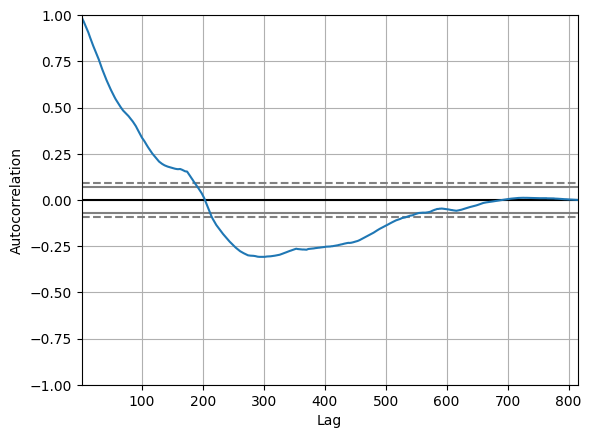

In [29]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()

In [30]:
from pmdarima import auto_arima
import warnings

warnings.filterwarnings('ignore')

In [31]:
stepwise_fit = auto_arima(df['preco_ultimo_negocio'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1186.791, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1203.062, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1199.367, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1198.923, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1201.073, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1187.910, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1200.923, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1180.992, Time=0.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1179.805, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1192.152, Time=0.15 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=1180.628, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1200.597, Time=0.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1182.057, Time=0.21 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1182.551, Time=0.69 sec
 ARIMA(3,1,1)(0,0,0)[0]          

predicted=8.145544, expected=8.200000
predicted=8.309652, expected=8.660000
predicted=8.579282, expected=8.670000
predicted=8.618969, expected=8.280000
predicted=8.309209, expected=8.750000
predicted=8.747992, expected=8.770000
predicted=8.716020, expected=8.550000
predicted=8.553934, expected=8.450000
predicted=8.510774, expected=8.290000
predicted=8.314290, expected=8.370000
predicted=8.390113, expected=8.440000
predicted=8.416792, expected=8.360000
predicted=8.363691, expected=8.300000
predicted=8.313479, expected=8.170000
predicted=8.202712, expected=8.190000
predicted=8.197273, expected=7.880000
predicted=7.932412, expected=8.000000
predicted=8.005579, expected=7.920000
predicted=7.945329, expected=8.000000
predicted=7.965594, expected=8.120000
predicted=8.128285, expected=8.050000
predicted=8.010829, expected=8.000000
predicted=8.042083, expected=7.750000
predicted=7.768900, expected=7.580000
predicted=7.654268, expected=6.850000
predicted=6.961583, expected=6.920000
predicted=7.

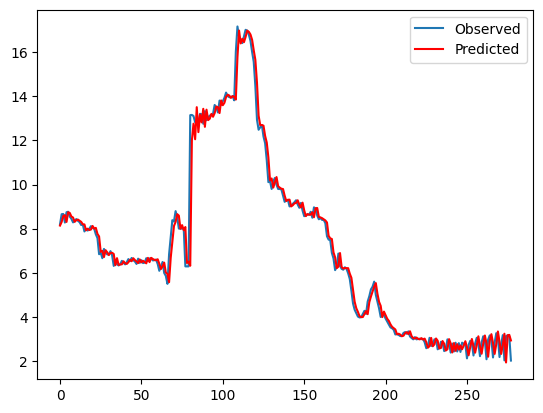

In [32]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(3,1,1))
    model_fit = model.fit()

    output = model_fit.forecast()
    yhat = output[0]

    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

pyplot.plot(test, label='Observed')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.legend()
pyplot.show()
